In [1100]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules


In [1101]:
df = pd.read_csv("owid-covid-data_2.csv")

In [1102]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


This is a large dataset, and we do not need all of the columns for our analysis, so we will drop the ones we know we will not use.

In [1103]:
df.drop(['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 
         'new_deaths_smoothed_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand'],axis=1, inplace=True)

In [1104]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.361500e+04,6.245800e+04,4.561700e+04,62458.000000,53303.000000,62131.000000,45318.000000,62131.000000,42503.000000,4820.000000,...,59640.000000,40595.000000,60223.000000,60948.000000,46809.000000,46155.000000,31107.000000,54657.000000,61936.000000,59966.000000
mean,2.348286e+05,2.332707e+03,8.502609e+03,51.911268,3930.044973,42.490562,108.151573,0.757332,1.042418,874.400000,...,18359.628910,13.901737,262.440663,7.899278,10.398516,32.685804,50.322399,2.998910,72.860324,0.708866
std,2.274804e+06,2.293374e+04,6.671221e+04,436.821909,7986.816328,145.254138,206.011422,3.028584,0.379048,2372.795746,...,19391.297382,20.222943,120.484426,4.195268,10.367791,13.519320,31.731927,2.438885,7.542751,0.153622
min,1.000000e+00,-1.003400e+04,1.000000e+00,-1918.000000,0.001000,-2153.437000,0.001000,-76.445000,0.000000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.950000e+02,0.000000e+00,2.200000e+01,0.000000,81.625500,0.000000,4.011000,0.000000,0.880000,11.000000,...,3823.194000,0.600000,170.050000,5.290000,1.900000,21.600000,19.351000,1.300000,67.270000,0.588000
50%,3.980000e+03,1.400000e+01,1.270000e+02,0.000000,622.395000,1.823000,20.343000,0.000000,1.040000,60.000000,...,11840.846000,2.200000,243.964000,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.736000
75%,3.914900e+04,2.720000e+02,1.098000e+03,4.000000,3940.980000,25.338500,99.594750,0.333000,1.210000,475.250000,...,26382.287000,21.400000,331.430000,10.080000,19.100000,41.100000,82.502000,3.861000,77.970000,0.825000
max,7.284868e+07,1.492366e+06,1.621154e+06,12912.000000,95541.319000,9760.898000,1557.774000,218.329000,6.750000,20922.000000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


We can see from this description (above) of the data that there are clearly some errors in the data.  The minimum of new cases is -8261, which is impossible, also the new deaths min is -1918.  After looking at this, we think that these negatives are simply typos, and should be turned positive to correctly reflect the data.

In [1105]:
df["new_cases"] = df["new_cases"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_deaths"] = df["new_deaths"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_cases_per_million"] = df["new_cases_per_million"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_deaths_per_million"] = df["new_deaths_per_million"].apply(lambda x: (x * -1) if (x < 0)else x)
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.361500e+04,6.245800e+04,4.561700e+04,62458.000000,53303.000000,62131.000000,45318.000000,62131.000000,42503.000000,4820.000000,...,59640.000000,40595.000000,60223.000000,60948.000000,46809.000000,46155.000000,31107.000000,54657.000000,61936.000000,59966.000000
mean,2.348286e+05,2.333696e+03,8.502609e+03,52.011079,3930.044973,42.637079,108.151573,0.766120,1.042418,874.400000,...,18359.628910,13.901737,262.440663,7.899278,10.398516,32.685804,50.322399,2.998910,72.860324,0.708866
std,2.274804e+06,2.293364e+04,6.671221e+04,436.810036,7986.816328,145.211197,206.011422,3.026373,0.379048,2372.795746,...,19391.297382,20.222943,120.484426,4.195268,10.367791,13.519320,31.731927,2.438885,7.542751,0.153622
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.001000,0.000000,0.001000,0.000000,0.000000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.950000e+02,0.000000e+00,2.200000e+01,0.000000,81.625500,0.000000,4.011000,0.000000,0.880000,11.000000,...,3823.194000,0.600000,170.050000,5.290000,1.900000,21.600000,19.351000,1.300000,67.270000,0.588000
50%,3.980000e+03,1.400000e+01,1.270000e+02,0.000000,622.395000,1.832000,20.343000,0.000000,1.040000,60.000000,...,11840.846000,2.200000,243.964000,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.736000
75%,3.914900e+04,2.730000e+02,1.098000e+03,4.000000,3940.980000,25.396000,99.594750,0.336000,1.210000,475.250000,...,26382.287000,21.400000,331.430000,10.080000,19.100000,41.100000,82.502000,3.861000,77.970000,0.825000
max,7.284868e+07,1.492366e+06,1.621154e+06,12912.000000,95541.319000,9760.898000,1557.774000,218.329000,6.750000,20922.000000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


We also see many NaN values before Covid cases and deaths are reported. Theese should obviously be coded as 0.  Not all NaN values will be given a 0 value, just the ones that have to do with Covid.  There are many countries that were not yet affected by Covid when the dataset begins.

In [1106]:
df[["new_cases", "total_cases", "total_deaths", "total_cases_per_million", "total_deaths_per_million", 
    "new_deaths_per_million", "icu_patients", "icu_patients_per_million", "hosp_patients", 
    "hosp_patients_per_million", "weekly_icu_admissions", "weekly_icu_admissions_per_million", 
    "weekly_hosp_admissions","weekly_hosp_admissions_per_million", "total_tests", "new_tests", 
    "total_tests_per_thousand", "new_tests_per_thousand", "tests_per_case", "positive_rate", 
    "stringency_index"]] = df[["new_cases", "total_cases", "total_deaths", "total_cases_per_million", 
                               "total_deaths_per_million", "new_deaths_per_million", 
                               "icu_patients","icu_patients_per_million", "hosp_patients", 
                               "hosp_patients_per_million", "weekly_icu_admissions", 
                               "weekly_icu_admissions_per_million", "weekly_hosp_admissions", 
                               "weekly_hosp_admissions_per_million","total_tests", "new_tests", 
                               "total_tests_per_thousand", "new_tests_per_thousand", "tests_per_case", 
                               "positive_rate", "stringency_index"]].fillna(0)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


We are going to use a subset of this data, only the Europena countries.  We are doing this because we hope to mitigate some of the vast differences between countries by choosing countries that are economically, geographically, and culturally similar.

In [1107]:
european_subset = df.loc[df['continent'] == "Europe"]
european_subset.head()

countries = european_subset.location.unique()
print(len(countries))

46


Now we remove some of the small European countries that could skew our data.  The countries removed are: Vatican City, Andorra, Gibraltar, San Marino, Luxembourg, Liechtenstein, Malta, Monaco, and Kosovo, Cyprus, Iceland, Montenegro, Macedonia

In [1108]:
#Clean up European dataset
# #df.drop(df[df['Age'] < 25].index, inplace = True) 
#print(european_subset.iso_code.unique())
european_subset.drop(european_subset[european_subset["iso_code"] == "VAT"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "AND"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "GBR"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "SMR"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "LUX"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "LIE"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MLT"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MCO"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "OWID_KOS"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "CYP"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "ISL"].index, inplace = True)
#european_subset.drop(european_subset[european_subset["iso_code"] == "BLR"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MNE"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MKD"].index, inplace = True)


#european_subset.drop(european_subset[european_subset["iso_code"] == "NOR"].index, inplace = True)
# european_subset.drop(european_subset[european_subset["iso_code"] == "MKD"].index, inplace = True)
# european_subset.drop(european_subset[european_subset["iso_code"] == "POL"].index, inplace = True)



print(european_subset.iso_code.unique())


['ALB' 'AUT' 'BLR' 'BEL' 'BIH' 'BGR' 'HRV' 'CZE' 'DNK' 'EST' 'FIN' 'FRA'
 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LVA' 'LTU' 'MDA' 'NLD' 'NOR' 'POL' 'PRT'
 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'ESP' 'SWE' 'CHE' 'UKR']


/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1109]:
#grouped_by_deaths_per_million = european_subset.groupby("iso_code")["total_deaths_per_million"].max()
g = european_subset.groupby(["iso_code"])
grouped_by_deaths_per_million = g.last()
grouped_by_deaths_per_million = grouped_by_deaths_per_million["total_deaths_per_million"]
grouped_by_deaths_per_million


iso_code
ALB     353.047
AUT     502.976
BEL    1557.774
BGR     840.188
BIH    1033.585
BLR     134.719
CHE     711.065
CZE     897.284
DEU     270.147
DNK     164.014
ESP    1026.911
EST     116.092
FIN      83.202
FRA     894.559
GRC     353.735
HRV     658.909
HUN     738.068
IRL     430.556
ITA    1075.240
LTU     303.054
LVA     186.618
MDA     644.032
NLD     593.410
NOR      72.493
POL     606.659
PRT     554.002
ROU     701.436
RUS     321.007
SRB     349.764
SVK     220.710
SVN    1013.501
SWE     744.014
UKR     361.094
Name: total_deaths_per_million, dtype: float64

In [1110]:
population_density= european_subset.groupby("iso_code")["population_density"].max()
#population_density
print(population_density)

iso_code
ALB    104.871
AUT    106.749
BEL    375.564
BGR     65.180
BIH     68.496
BLR     46.858
CHE    214.243
CZE    137.176
DEU    237.016
DNK    136.520
ESP     93.105
EST     31.033
FIN     18.136
FRA    122.578
GRC     83.479
HRV     73.726
HUN    108.043
IRL     69.874
ITA    205.859
LTU     45.135
LVA     31.212
MDA    123.655
NLD    508.544
NOR     14.462
POL    124.027
PRT    112.371
ROU     85.129
RUS      8.823
SRB     80.291
SVK    113.128
SVN    102.619
SWE     24.718
UKR     77.390
Name: population_density, dtype: float64


0.42548278325841615


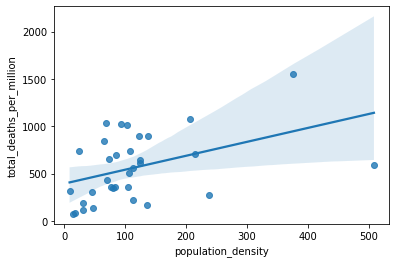

In [1111]:
#Relation between population density and deaths per million
sns.regplot(population_density,grouped_by_deaths_per_million)
r_pop_den= np.corrcoef(population_density, grouped_by_deaths_per_million)
print(r_pop_den[0,1])


-0.2642484186758362

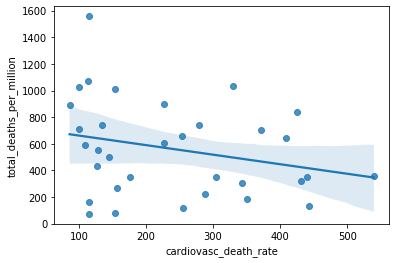

In [1112]:
#now for Cardiovascular Death Rate
cardiovascular_death_rate= european_subset.groupby("iso_code")["cardiovasc_death_rate"].max()

sns.regplot(cardiovascular_death_rate, grouped_by_deaths_per_million)
r_cardio = np.corrcoef(cardiovascular_death_rate, grouped_by_deaths_per_million)
r_cardio[0,1]

0.2729605683910687

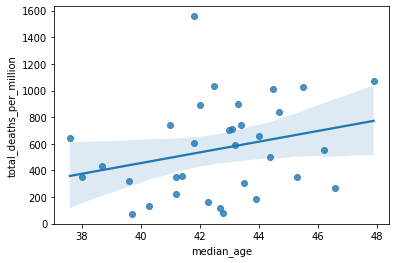

In [1113]:
#now for median age and covid deaths per 1 million
median_age = european_subset.groupby("iso_code")["median_age"].max()

sns.regplot(median_age, grouped_by_deaths_per_million)
r_ma = np.corrcoef(median_age, grouped_by_deaths_per_million)
r_ma[0,1]

0.1928626982423877

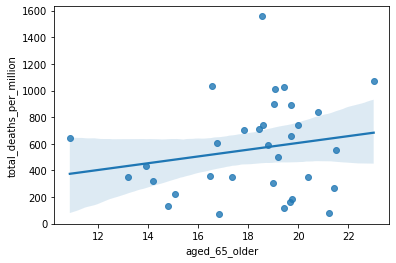

In [1114]:
#now for aged 65 and older rate
sixty_five_and_older = european_subset.groupby("iso_code")["aged_65_older"].max()

sns.regplot(sixty_five_and_older, grouped_by_deaths_per_million)
r_sixty_five = np.corrcoef(sixty_five_and_older, grouped_by_deaths_per_million)
r_sixty_five[0,1]

iso_code
ALB     89.81
AUT     82.41
BEL     81.48
BGR     73.15
BIH     92.59
BLR     22.22
CHE     73.15
CZE     82.41
DEU     76.85
DNK     72.22
ESP     85.19
EST     77.78
FIN     67.59
FRA     87.96
GRC     84.26
HRV     96.30
HUN     76.85
IRL     90.74
ITA     93.52
LTU     87.04
LVA     69.44
MDA     87.04
NLD     79.63
NOR     79.63
POL     83.33
PRT     87.96
ROU     87.04
RUS     87.04
SRB    100.00
SVK     87.04
SVN     89.81
SWE     68.52
UKR     88.89
Name: stringency_index, dtype: float64


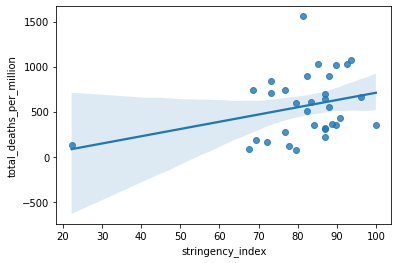

In [1115]:
#now doing stringency index



stringency_index = european_subset.groupby("iso_code")["stringency_index"].max()
sns.regplot(stringency_index, grouped_by_deaths_per_million)

r_stringency = np.corrcoef(stringency_index, grouped_by_deaths_per_million)
r_stringency[0,1]


#print(type(stringency_index))

# df_stringency = pd.DataFrame(stringency_index)
# print(len(stringency_index))
# print(len(grouped_by_deaths_per_million))
# print(df_stringency).head()


# x = stringency_index
# y = grouped_by_deaths_per_million
# labels = european_subset.iso_code.unique()

# fig, ax, = plt.subplots(1, figsize=(10,6))
# fig.suptitle("Stringency Index")

# ax.scatter(x,y,color="blue", s=100, alpha=0.5,linewidths=1)

# for x_pos, y_pos, label in zip(x,y,labels):
#     ax.annotate(label, 
#                 xy=(x_pos, y_pos), 
#                 xytext = (7,0),
#                textcoords="offset points",
#                ha="left",
#                va='center')
# plt.show()

print(stringency_index)
# print(grouped_by_deaths_per_million)
# print(european_subset.iso_code.unique().sort())


0.045702588413508896

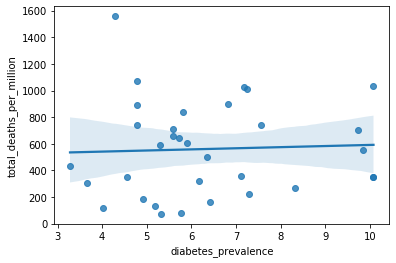

In [1116]:
#now doing diabetes prevalence
diabetes_prevalence = european_subset.groupby("iso_code")["diabetes_prevalence"].max()

sns.regplot(diabetes_prevalence, grouped_by_deaths_per_million)

r_diabetes = np.corrcoef(diabetes_prevalence, grouped_by_deaths_per_million)
r_diabetes[0,1]


0.019999602662022026

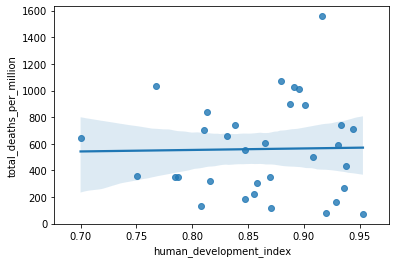

In [1117]:
#now for human development index
hdi = european_subset.groupby("iso_code")["human_development_index"].max()

sns.regplot(hdi, grouped_by_deaths_per_million)

r_hdi = np.corrcoef(hdi, grouped_by_deaths_per_million)
r_hdi[0,1]

-0.13218035213697668

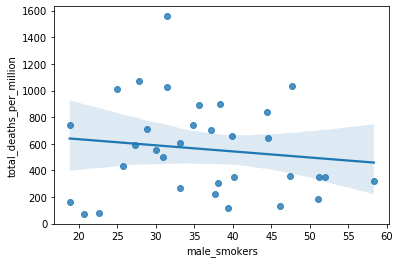

In [1118]:
#now for male smokers max

male_smokers = european_subset.groupby("iso_code")["male_smokers"].max()

sns.regplot(male_smokers, grouped_by_deaths_per_million)

r_male_smoke = np.corrcoef(male_smokers, grouped_by_deaths_per_million)
r_male_smoke[0,1]

-0.02338313955443997

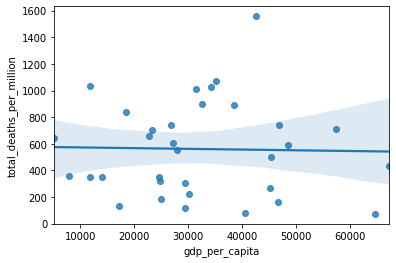

In [1119]:
#GDP per Capita
gdp_per_capita = european_subset.groupby("iso_code")["gdp_per_capita"].max()
sns.regplot(gdp_per_capita, grouped_by_deaths_per_million)

r_gdp = np.corrcoef(gdp_per_capita, grouped_by_deaths_per_million)
r_gdp[0,1]

0.21870709760700657

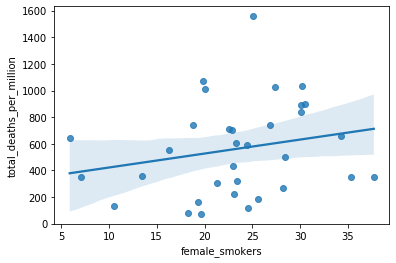

In [1120]:
#Female Smokers
female_smokers = gdp_per_capita = european_subset.groupby("iso_code")["female_smokers"].max()
sns.regplot(female_smokers, grouped_by_deaths_per_million)

r_female_smoke = np.corrcoef(female_smokers, grouped_by_deaths_per_million)
r_female_smoke[0,1]


0.25305506976512593

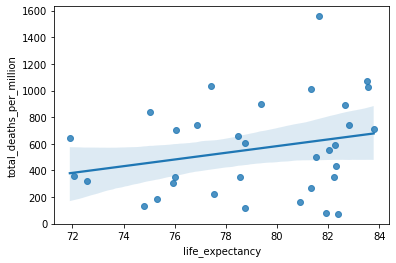

In [1121]:
#Life Expectency
life_expectency = gdp_per_capita = european_subset.groupby("iso_code")["life_expectancy"].max()
sns.regplot(life_expectency, grouped_by_deaths_per_million)

r_life = np.corrcoef(life_expectency, grouped_by_deaths_per_million)
r_life[0,1]

-0.12725281864244395

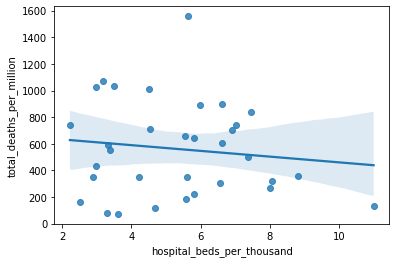

In [1122]:
#Hospital Beds per thousand
hospital_beds = gdp_per_capita = european_subset.groupby("iso_code")["hospital_beds_per_thousand"].max()
sns.regplot(hospital_beds, grouped_by_deaths_per_million)

r_hosp_beds = np.corrcoef(hospital_beds, grouped_by_deaths_per_million)
r_hosp_beds[0,1]

0.1690181656512361

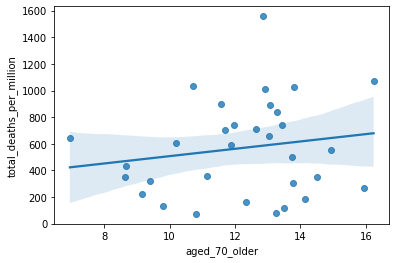

In [1123]:
european_subset_no_serb = european_subset.copy()
european_subset_no_serb.drop(european_subset_no_serb[european_subset_no_serb["iso_code"] == "SRB"].index, inplace = True)

g = european_subset_no_serb.groupby(["iso_code"])
grouped_by_deaths_per_million_no_serb = g.last()
grouped_by_deaths_per_million_no_serb = grouped_by_deaths_per_million_no_serb["total_deaths_per_million"]

age_seventy = european_subset_no_serb.groupby("iso_code")["aged_70_older"].max()
sns.regplot(age_seventy, grouped_by_deaths_per_million_no_serb)
r_seventy = np.corrcoef(age_seventy, grouped_by_deaths_per_million_no_serb)
r_seventy[0,1]


In [1124]:
european_subset.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.721420,0.776305,0.605130,0.546362,0.300988,0.484598,0.283080,-0.101612,0.395819,...,0.023057,8.014281e-03,-0.045509,-0.024295,0.063270,0.093192,-4.930904e-02,0.095985,0.022129,0.033973
new_cases,0.721420,1.000000,0.552189,0.607217,0.436107,0.565212,0.351841,0.350278,0.009861,0.445735,...,0.015366,4.033173e-02,-0.048019,-0.014199,0.060778,0.046910,8.156666e-02,0.083029,0.033606,0.031492
total_deaths,0.776305,0.552189,1.000000,0.530148,0.389693,0.178425,0.671682,0.215178,-0.096077,0.486405,...,0.105082,1.243303e-01,-0.265289,-0.113391,0.084771,-0.080286,-1.569417e-01,-0.084989,0.265000,0.142644
new_deaths,0.605130,0.607217,0.530148,1.000000,0.345657,0.295633,0.338900,0.605926,-0.063727,0.658159,...,0.026325,8.933534e-02,-0.104994,-0.043428,0.061019,0.005069,2.719114e-02,0.018989,0.098601,0.049097
total_cases_per_million,0.546362,0.436107,0.389693,0.345657,1.000000,0.697110,0.726593,0.646957,-0.135154,0.263704,...,0.042877,-1.636601e-02,-0.090676,-0.006360,0.006376,-0.061845,-1.322249e-01,-0.024424,0.080739,0.032605
new_cases_per_million,0.300988,0.565212,0.178425,0.295633,0.697110,1.000000,0.406075,0.623747,0.050865,0.224410,...,-0.005657,9.822249e-03,-0.036555,0.022878,0.057207,-0.033603,3.213792e-02,0.004495,0.032360,0.005487
total_deaths_per_million,0.484598,0.351841,0.671682,0.338900,0.726593,0.406075,1.000000,0.475748,-0.149945,0.339200,...,0.204277,2.355474e-02,-0.332845,-0.150125,0.022863,-0.239078,-1.736226e-01,-0.228135,0.324920,0.199821
new_deaths_per_million,0.283080,0.350278,0.215178,0.605926,0.646957,0.623747,0.475748,1.000000,-0.094785,0.378175,...,-0.004288,4.788440e-02,-0.080616,0.012515,0.064767,-0.040491,8.702302e-03,-0.039974,0.077692,0.008734
reproduction_rate,-0.101612,0.009861,-0.096077,-0.063727,-0.135154,0.050865,-0.149945,-0.094785,1.000000,-0.039331,...,0.004744,1.089811e-02,-0.019839,0.012149,0.035692,-0.007661,8.368957e-02,0.018351,0.021856,0.012489
icu_patients,0.395819,0.445735,0.486405,0.658159,0.263704,0.224410,0.339200,0.378175,-0.039331,1.000000,...,0.081327,2.390849e-01,-0.216501,-0.096520,0.090876,-0.087516,NaN,-0.047874,0.210332,0.108255


In [1125]:
print("Population Density: " + str(r_pop_den[0,1]))
print("GDP per Capita: " + str(r_gdp[0,1]))
print("Life Expectancy: " + str(r_life[0,1]))
print("Human Development Index: " + str(r_hdi[0,1]))
print("Median Age: " + str(r_ma[0,1]))
print("Age over 65: " + str(r_sixty_five[0,1]))
print("Age over 70: " + str(r_seventy[0,1]))
print("Stringency Index: " + str(r_stringency[0,1]))
print("Cardiovascular Death Rate: " + str(r_cardio[0,1]))
print("Diabetes Prevalence: " + str(r_diabetes[0,1]))
print("Male Smokers: " + str(r_male_smoke[0,1]))
print("Female Smokers: " + str(r_female_smoke[0,1]))
print("Hospital Beds per 1000: " + str(r_hosp_beds[0,1]))

Population Density: 0.42548278325841615
GDP per Capita: -0.02338313955443997
Life Expectancy: 0.25305506976512593
Human Development Index: 0.019999602662022026
Median Age: 0.2729605683910687
Age over 65: 0.1928626982423877
Age over 70: 0.1690181656512361
Stringency Index: 0.3032722564808353
Cardiovascular Death Rate: -0.2642484186758362
Diabetes Prevalence: 0.045702588413508896
Male Smokers: -0.13218035213697668
Female Smokers: 0.21870709760700657
Hospital Beds per 1000: -0.12725281864244395


Below here I will try some association analysis

In [1126]:
#Checking for nan values
print(european_subset["population_density"].isnull().values.any())
print(european_subset["gdp_per_capita"].isnull().values.any())
print(european_subset["life_expectancy"].isnull().values.any())
print(european_subset["human_development_index"].isnull().values.any())
print(european_subset["median_age"].isnull().values.any())
print(european_subset["aged_65_older"].isnull().values.any())
print(european_subset["aged_70_older"].isnull().values.any())
print(european_subset["stringency_index"].isnull().values.any())
print(european_subset["cardiovasc_death_rate"].isnull().values.any())
print(european_subset["male_smokers"].isnull().values.any())
print(european_subset["female_smokers"].isnull().values.any())
print(european_subset["hospital_beds_per_thousand"].isnull().values.any())

False
False
False
False
False
False
True
False
False
False
False
False


So we can see that the only missing data is the aged_70_older and is from Serbia, like we saw previously.

In [1127]:
# basket = (df[df['Country'] =="France"]
#           .groupby(['InvoiceNo', 'Description'])['Quantity']
#           .sum().unstack().reset_index().fillna(0)
#           .set_index('InvoiceNo'))

# basket = (european_subset.groupby(["iso_code"])["diabetes_prevalence"]
#           .max().unstack())
#print(diabetes_prevalence)
# print(cardiovascular_death_rate)
# plt.boxplot(diabetes_prevalence)
# plt.show()


data = [[ 1,0,1],
       [1,1,0],
       [0,1,1],
       [0,0,1],
       [0,1,1],
       [0,1,1],
        [0,1,1],
        [0,1,1],
        [0,1,1],
        [0,1,1],
        [0,1,1]
       ]

test_df = pd.DataFrame(data, columns=["Diabetes", 
                                      "Cardiovascular", 
                                      "Deaths"])


test_df.head()


,Diabetes,Cardiovascular,Deaths
0,1,0,1
1,1,1,0
2,0,1,1
3,0,0,1
4,0,1,1


In [1128]:

#basket = test_df.groupby(["Diabetes", "Cardiovascular"])
#test_df.set_index('Country')

frequent_itemsets = apriori(test_df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Diabetes),(Cardiovascular),0.181818,0.818182,0.090909,0.500000,0.611111,-0.057851,0.363636
1,(Cardiovascular),(Diabetes),0.818182,0.181818,0.090909,0.111111,0.611111,-0.057851,0.920455
2,(Diabetes),(Deaths),0.181818,0.909091,0.090909,0.500000,0.550000,-0.074380,0.181818
3,(Deaths),(Diabetes),0.909091,0.181818,0.090909,0.100000,0.550000,-0.074380,0.909091
4,(Deaths),(Cardiovascular),0.909091,0.818182,0.727273,0.800000,0.977778,-0.016529,0.909091


In [1129]:
print("Diabetes Median: " + str(diabetes_prevalence.median()))
print("Cardiovascular Death Rate Median: " + str(cardiovascular_death_rate.median()))

Diabetes Median: 5.81
Cardiovascular Death Rate Median: 227.331


In [1130]:
association_df = pd.DataFrame()

In [1132]:
temp_df = population_density
temp_df = temp_df.to_frame()
 
temp_df.rename(columns = {"population_density": "population_density_high"}, inplace=True)
temp_df["population_density_low"] = 0

pop_mean = population_density.median()

for index, value in enumerate(temp_df["population_density_high"]):
    if value > pop_mean:
        temp_df["population_density_high"][index] = 1
        temp_df["population_density_low"][index] = 0
    else:
        temp_df["population_density_high"][index] = 0
        temp_df["population_density_low"][index] = 1

        
temp_df

/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packag

,population_density_high,population_density_low
iso_code,,
ALB,1.0,0
AUT,1.0,0
BEL,1.0,0
BGR,0.0,1
BIH,0.0,1
BLR,0.0,1
CHE,1.0,0
CZE,1.0,0
DEU,1.0,0


In [1137]:
association_df["population_density_high"] = temp_df["population_density_high"]
association_df["population_density_low"] = temp_df["population_density_low"]
association_df

,population_density_high,population_density_low
iso_code,,
ALB,1.0,0
AUT,1.0,0
BEL,1.0,0
BGR,0.0,1
BIH,0.0,1
BLR,0.0,1
CHE,1.0,0
CZE,1.0,0
DEU,1.0,0
